<a href="https://colab.research.google.com/github/shiernee/Advanced_ML/blob/main/Week3/WOA7015_Wk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to WOA7015 Advance Machine Learning Lab - Week 3
This code is generated for the purpose of WOA7015 module.
The code is available in github https://github.com/shiernee/Advanced_ML 


# The effect of imbalanced data on AUROC 
The following code evaluates the effect of imbalanced data on the AUROC of TPR-FPR curve. 


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'decreasing positive sample')

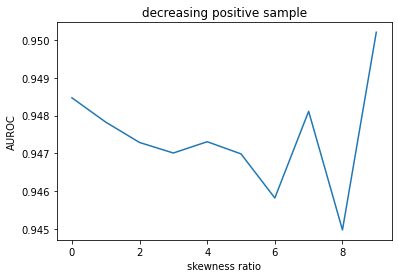

In [ ]:
# roc curve and auc on an imbalanced dataset
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler


# generate 2 class dataset 
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1000)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=1000)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# make testing dataset balance
undersample = RandomUnderSampler(sampling_strategy='majority')
testX, testy = undersample.fit_resample(testX, testy)

# repeat with different skewness 
roc_list = []
k=1
for i in range(0, 10):
  pos_ind = np.where(testy==1)[0]
  n = int(i/10 * len(pos_ind))
  tmp_testX, tmp_testy = np.copy(testX), np.copy(testy)
  tmp_testX = np.delete(tmp_testX, pos_ind[:n], axis=0)
  tmp_testy = np.delete(tmp_testy, pos_ind[:n], axis=0)
  # print('positive: %d negative: %d' % (tmp_testy.sum(), 
  #                                      tmp_testy.shape[0] - tmp_testy.sum()))
  # print('----')
  
  # predict probabilities
  lr_probs = model.predict_proba(tmp_testX)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # calculate scores
  lr_auc = roc_auc_score(tmp_testy, lr_probs)
  # summarize scores
  # print('iteration %d: Logistic: ROC AUC=%.3f' % (k, lr_auc))
  k += 1
  # calculate roc curves
  lr_fpr, lr_tpr, _ = roc_curve(tmp_testy, lr_probs)
  roc_list.append(lr_auc)



plt.plot(np.arange(0, len(roc_list)), roc_list)
plt.xlabel('skewness ratio')
plt.ylabel('AUROC')
plt.title('decreasing positive sample')

# Exercise 1 (2%):
Does the AUROC (TPR vs FPR) affected by imbalanced class?




In [ ]:
# Your answer here


# The effect of imbalanced data on AUROC of PR curve and F1 score
The following code evaluates the effect of imbalanced data on the AUROC of Precision-Recall and F1 value. 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'decreasing positive sample')

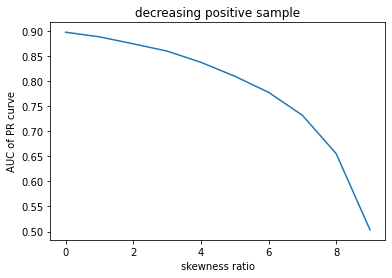

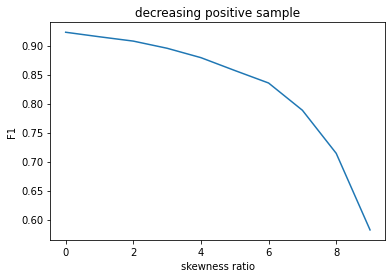

In [ ]:
# roc curve and auc on an imbalanced dataset
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, f1_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# generate 2 class dataset 
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1000)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=1000)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# make testing dataset balance
undersample = RandomUnderSampler(sampling_strategy='majority')
testX, testy = undersample.fit_resample(testX, testy)

# repeat with different skewness 
roc_list = []
f1_list = []

k=1
for i in range(0, 10):
  pos_ind = np.where(testy==1)[0]
  n = int(i/10 * len(pos_ind))
  tmp_testX, tmp_testy = np.copy(testX), np.copy(testy)
  tmp_testX = np.delete(tmp_testX, pos_ind[:n], axis=0)
  tmp_testy = np.delete(tmp_testy, pos_ind[:n], axis=0)
  # print('positive: %d negative: %d' % (tmp_testy.sum(), 
  #                                      tmp_testy.shape[0] - tmp_testy.sum()))
  # print('----')

  # predict probabilities
  lr_probs = model.predict_proba(tmp_testX)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # predict class values
  yhat = model.predict(tmp_testX)
  # calculate precision and recall for each threshold
  lr_precision, lr_recall, _ = precision_recall_curve(tmp_testy, lr_probs)
  # calculate scores
  lr_f1, lr_auc = f1_score(tmp_testy, yhat), auc(lr_recall, lr_precision)
  # summarize scores
  # print('iteration%d Logistic: f1=%.3f auc=%.3f' % (k, lr_f1, lr_auc))
  k += 1
  roc_list.append(lr_auc)
  f1_list.append(lr_f1)




plt.plot(np.arange(0, len(roc_list)), roc_list)
plt.xlabel('skewness ratio')
plt.ylabel('AUC of PR curve')
plt.title('decreasing positive sample')

plt.figure()
plt.plot(np.arange(0, len(roc_list)), f1_list)
plt.xlabel('skewness ratio')
plt.ylabel('F1')
plt.title('decreasing positive sample')


# Exercise 2 (4%):
Does the AUROC (Precision vs Recall), F1 score affected by imbalanced class?

In [ ]:
# Your answer here

# ***Let's go back to power point - slide 13***

# Convex function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

x = np.arange(-2, 2, 0.01)

# choose one function to try
f = lambda x: 0.5 * x ** 2 # Convex
# f = lambda x: np.cos(np.pi * x)  # Nonconvex
# f = lambda x: -0.5 * x ** 4  # Nonconvex

filenames=[]
for lamda in np.arange(0, 1, 0.02):
  # LHS
  tmp_x = lamda*x[0] + (1-lamda)*x[-1]

  # RHS
  x_line, y_line = np.array([x[0], x[-1]]), np.array([lamda*f(x[0]), (1-lamda)*f(x[-1])])

  # compute LHS and RHS
  LHS = f(tmp_x)
  RHS = lamda*f(x[0]) + (1-lamda)*f(x[-1])
  if LHS > RHS:
    print('At lamda %0.3f, it is concave' % lamda)
    print('lhs %.5f rhs %.5f' % (LHS, RHS))

  plt.figure()
  # original graph
  plt.plot(x, f(x), label='f(x)')
  # plot RHS
  plt.plot(x_line, y_line, label='%0.3f' % lamda)
  # plot LHS
  plt.scatter(tmp_x, f(tmp_x))
  #title, legennd
  plt.title('lhs %.3f rhs %.3f' % (LHS, RHS))
  plt.legend()
  # plt.savefig('lamda %0.3f.png' % lamda)
  # plt.close()
  filenames.append('lamda %0.3f.png' % lamda)

# Build GIF
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Understand how learning rate affects your deep learning

We will train a neural network for a pretty simple task, i.e. calculating the exclusive-or (XOR) of two input. 

<br> 
<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week3/XOR.jpg" width="512"/>

<br><br> 
For this experiment, try various values for the learning rate. Answer the following questions:
1. For what range of values does the network learn and reach 100% accuracy? 
2. For what values does the network training diverge and become unstable? 
3. For what values does it learn too slowly to each optimal accuracy in 100 epochs?

Give your answer at the second last cell. 

In [ ]:
import random
import numpy as np
 
# make data for an XOR model 
def make_data():
    x1 = random.randint(0, 1)
    x2 = random.randint(0, 1)
    yy = 0 if (x1 == x2) else 1
 
    # centered at zero
    x1 = 2. * (x1 - 0.5)
    x2 = 2. * (x2 - 0.5)
    yy = 2. * (yy - 0.5)
 
    # add noise
    x1 += 0.1 * random.random()
    x2 += 0.1 * random.random()
    yy += 0.1 * random.random()
 
    return [x1, x2, ], yy
 
batch_size = 10
def make_batch():
    data = [make_data() for ii in range(batch_size)]
    labels = [label for xx, label in data]
    data = [xx for xx, label in data]
    return np.array(data, dtype='float32'), np.array(labels, dtype='float32')
 
print(make_batch())
print(make_batch())
print(make_batch())
 
train_data = [make_batch() for ii in range(500)]
test_data = [make_batch() for ii in range(50)]


(array([[-0.93669856,  1.0342579 ],
       [-0.9531177 , -0.92773193],
       [-0.99807304,  1.0144758 ],
       [ 1.0187685 , -0.981505  ],
       [-0.9812303 , -0.9320964 ],
       [-0.9515768 , -0.91979605],
       [ 1.0054866 , -0.90109605],
       [ 1.0325581 ,  1.0017756 ],
       [-0.90817994,  1.0635471 ],
       [-0.9621115 ,  1.0309031 ]], dtype=float32), array([ 1.0594254 , -0.9975205 ,  1.0460427 ,  1.001113  , -0.9862703 ,
       -0.97558445,  1.0968559 , -0.9074342 ,  1.038376  ,  1.0169532 ],
      dtype=float32))
(array([[ 1.068697  , -0.952613  ],
       [-0.93149465,  1.0211823 ],
       [ 1.090459  , -0.99647975],
       [-0.9725911 ,  1.0880694 ],
       [-0.9994258 ,  1.0635469 ],
       [-0.9788463 , -0.9271377 ],
       [ 1.0275505 ,  1.0015891 ],
       [-0.9265675 ,  1.0111583 ],
       [ 1.0843601 , -0.9494442 ],
       [ 1.0424035 ,  1.0348085 ]], dtype=float32), array([ 1.0449327 ,  1.0783228 ,  1.0549217 ,  1.0183194 ,  1.0171376 ,
       -0.9384077 , -0.91

In [ ]:
## Define our neural network 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
 
torch.manual_seed(42)
 
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
 
        self.dense1 = nn.Linear(2, 2)
        self.dense2 = nn.Linear(2, 1)
 
        print(self.dense1.weight)
        print(self.dense1.bias)
        print(self.dense2.weight)
        print(self.dense2.bias)
 
        # self.dense1.weight.data.uniform_(-1.0, 1.0)
        # self.dense1.bias.data.uniform_(-1.0, 1.0)
        # self.dense2.weight.data.uniform_(-1.0, 1.0)
        # self.dense2.bias.data.uniform_(-1.0, 1.0)
 
    def forward(self, x):
        x = F.tanh(self.dense1(x))
        x = self.dense2(x)
        return torch.squeeze(x)
 
model = NN()
 
## optimizer = stochastic gradient descent
optimizer = optim.SGD(model.parameters(), lr=0.0005)

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496]], requires_grad=True)
Parameter containing:
tensor([-0.1549,  0.1427], requires_grad=True)
Parameter containing:
tensor([[-0.3443,  0.4153]], requires_grad=True)
Parameter containing:
tensor([0.6233], requires_grad=True)


In [ ]:
## train and test functions
 
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_data):
        data, target = Variable(torch.from_numpy(data)), Variable(torch.from_numpy(target))
        optimizer.zero_grad()
        output = model(data)
        loss = F.mse_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} {}\tLoss: {:.4f}'.format(epoch, batch_idx * len(data), loss.item()))
 
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_data:
        data, target = Variable(torch.from_numpy(data), volatile=True), Variable(torch.from_numpy(target))
        output = model(data)
        test_loss += F.mse_loss(output, target)
        correct += (np.around(output.data.numpy()) == np.around(target.data.numpy())).sum()
 
    test_loss /= len(test_data)
    test_loss = test_loss.item()
 
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, batch_size * len(test_data), 100. * correct / (batch_size * len(test_data))) )
 

In [ ]:
## run experiment 
 
nepochs = 100
for epoch in range(1, nepochs + 1):
    train(epoch)
    test()
 

## Exercise 3 (6%) 
For this experiment, try various values for the learning rate. Answer the following questions:
1. For what range of values does the network learn and reach 100% accuracy? 
2. For what values does the network training diverge and become unstable? 
3. For what values does it learn too slowly to each optimal accuracy in 100 epochs?


### Your answer here
Q1: 
<br> Q2:
<br> Q3

# Submission Instructions
Once you are finished, follow these steps:

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells.
If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
Double check that there is a number next to each code cell and that these numbers are in order.
Then, submit your lab as follows:

Go to File > Print > Save as PDF.
Double check that the entire notebook, from beginning to end, is in this PDF file. Make sure Solution for Exercise 5 are in for marks. 
Upload the PDF to Spectrum. 

# Acknowledgement

Some of the works are inspired from 
1. Effect of learning rate on AI model = https://www.commonlounge.com/discussion/5076b2cfb2364594ba608fca3ac606bb